### 전체적인 프로세스

1. 데이터셋 확인 :  데이터의 컬럼, 형태, NaN 값 등을 확인


2. 탐색적 데이터분석(Exploratory Data Analysis) : 여러 feature 들을 개별적으로 분석하고 상관관계를 확인, 시각화


3. feature engineering : 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 처리

   (one-hot-encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등)


4. model 만들기 :  sklearn을 사용하여 모델을 만들기. 그외에 tenser flow, pytorch 등이 있음


5. 모델 학습 및 예측 : train set를 가지고 모델을 학습시긴 후 test set을 예측


6. 모델 평가 : 예측 성능이 원하는 수준인지 판단

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 그래프 그리는 용도
import seaborn as sns

## matplotlib를 어떤 스타일로 쓸 것인지
plt.style.use('seaborn')
# 폰트 크기 조절
sns.set(font_scale = 2)

## missingno : NaN 데이터  시각화를 용이하게 해주는 패키지
## 처음 주피터 노트북에는 missingno 패키지가 설치되어 있지 않습니다.
## 설치 : pip install missingno
import missingno as msno

## ignore warning
import warnings
warnings.filterwarnings('ignore')

## 그래프를 그림으로 나타내기
%matplotlib inline

### matplotlib 그래프 스타일 갤러리

* https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html 


### 결측치 관련
* pip install missingno  : missingno 라이브러리 설치
 
* https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/

      - MCAR(Missing Completely at random) : 변수의 종류, 값과 관계 없이 전체적으로 무작위로 나타남. 누락 데이터 분석에는 큰 영향을 주지 않으나 실제로 MCAR의 경우는 많이 없음
      - MAR(Missing at random) : 누락된 자료가 특정 변수와 관련되어 일어나지만 그 변수의 값과는 관계가 없는 경우, 가령 어떤 설문조사에서 누락된 자료가 특정 변수들에 국한되어 발견되었는데 알고보니 일부 대상자가 설문 3페이지에 반대쪽 면이 있는 것을 모르고 채우지 않았을 경우
      - MNAR(Missing at not random) : 누락된 변수의 값과 누락된 이유가 관련이 있는 경우, 가령 우울증에 관한 설문조사를 하는데 실제로 우울증이 심한 경우에는 우울한 기분에 대해 조사하는 항목에 대한 대답을 기피하여 누락되는 경우, 혹은 정치적인 이유로 대답을 회피하는 경우

# 1. 데이터세트 확인

* Survived :(Integer) 생존여부 - 0이면 사망, 1이면 생존 --> 타이타닉 경진대회에서 예측 대상 
* Pclass : (Integer) 좌석등급 --> 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex : (String) 성별 --> male, female
* Age : (Float) 연령
* SibSp : (Integer) 탑승한 배우자와 형제의 수
* Parch : (Integer) 탑승한 부모와 자식의 수
* Ticket :(String) 티켓 번호
* Cabin : (String) 객실번호
* Embarked : (String) 출발지  --> C = Cherbourg, S = Southhampton, Q = Queenstown

 ### 타이타닉 데이터 세트 내용

In [3]:
df_train = pd.read_csv('./data/train.csv')  ## train 데이터 셋 불러오기
print(df_train.shape) ## 행과 열의 수 조회
df_train.head() ## 상위 5개 행 데이터 조회, 괄호안에 숫자를 넣음으로 써 조회하는 데이터 행의 수 조절

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.dtypes # 각 컬럼별 데이터의 형태 조회

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df_train.describe() ## 각 feature들이 가진 통계치를 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


생존률은 약 38.38%

Age 데이터의 숫자가 891개가 아닌 것으로 보아 결측치가 존재

In [5]:
df_test = pd.read_csv('test.csv')  ## test 데이터 셋 불러오기
print(df_test.shape) ## 행과 열의 수 조회
df_test.head() ## 상위 5개 행 데이터 조회, 괄호안에 숫자를 넣음으로 써 조회하는 데이터 행의 수 조절

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


test 데이터 세트에서도 역시 Age에 결측치가 존재, Fare에서도 1개 존재

## 1.1 Null Data Check

In [7]:
df_train.columns #df_train의 컬럼명 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_test.columns #df_test의 컬럼명

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
## 각 컬럼별로 NaN값의 비율을 for 구문을 활용하여 출력

for col in df_train.columns:
    msg = "column: {:>10}\t Percent of NaN value: {:.2f}%".format(col, 100*df_train[col].isnull().sum()/df_train[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = "column: {0:>10}\t Percent of NaN value: {1:.2f}%".format(col, 100*df_test[col].isnull().sum()/df_test[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


* Train과 Test Set 모두 Age에서 약 20%, Cabin에서 약 78%의 결측치가 존재하는 것을 볼 수 있습니다.

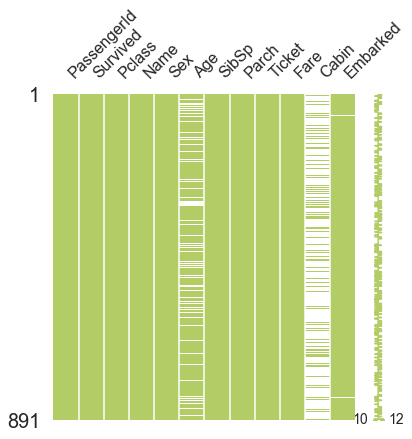

In [11]:
## missingno 패키지를 활용하여 NaN데이터에 관해 시각화하기
msno.matrix(df = df_train.iloc[:,:], figsize=(6,6), color=(0.7, 0.8, 0.4))
## color 안의 괄호는 숫자를 RGB코드로 나타낸 것으로, 첫번쨰 숫자는 빨강, 두번째 숫자는 초록, 세번쨰 숫자는 노랑, 0~1의 비율을 입력하여 색감 조절

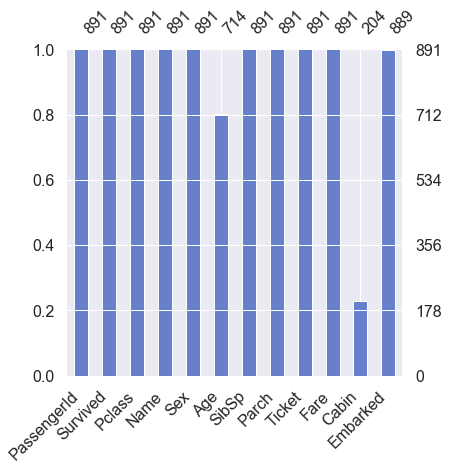

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(6,6), color=(0.4,0.5,0.8))

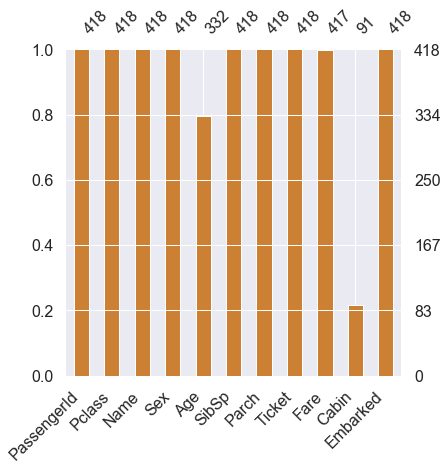

In [13]:
msno.bar(df=df_test.iloc[:,:], figsize=(6,6), color=(0.8,0.5,0.2))

## 1.2 Target label 확인

* target lable(Survived) 가 어떤 분포를 가지고 있는지 확인해보아야 합니다.
* 지금과 같은 binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

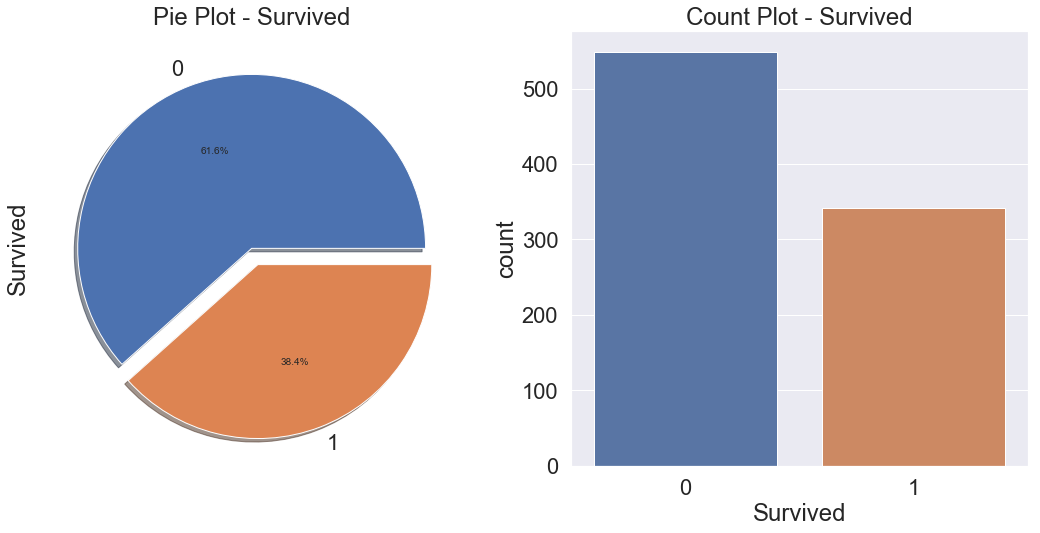

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,8)) ##그래프를 여러 개 그려내기 
# 위와 동일하게 subplot을 세팅하는 문장
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#fig.set_size_inches(18,8)

df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
                                                                   # 파이간 간격조절, 파이 안의 숫자 자릿수 조절,      음영표시 해제
ax[0].set_title('Pie Plot - Survived')

sns.countplot(data=df_train, x="Survived", ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

 * 사망한 사람이 더 많음: 약 61.6%
 * Target label의 분포가 제법 균일하게 나옴. 불균일

* 위의 파이 그래프가 그려지는 과정

In [15]:
df_train['Survived'].value_counts() #Survived 가 가지는 값의 수 count

0    549
1    342
Name: Survived, dtype: int64

In [16]:
type(df_train['Survived'].value_counts()) ## 위의 결과는 Series 형태로 데이터 저장

pandas.core.series.Series

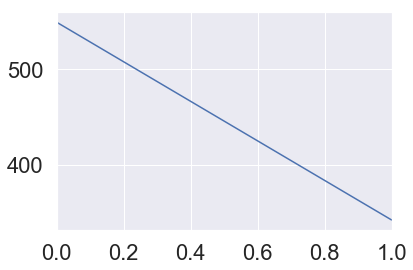

In [17]:
# Series 형태의 데이터는 판다스로 plot을 그릴 수 있음
df_train['Survived'].value_counts().plot()

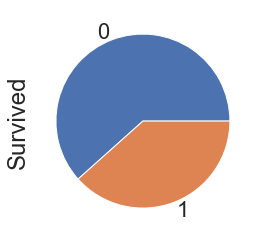

In [18]:
# pie plot 그리기
df_train['Survived'].value_counts().plot.pie()
# df_train['Survived'].value_counts().plot(kind='pie')  이 문장으로도 동일한 pie 그래프가 나옴

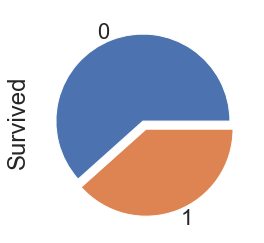

In [19]:
# pie 조각 떨어뜨리기
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1])
# df_train['Survived'].value_counts().plot(kind='pie')  이 문장으로도 동일한 pie 그래프가 나옴

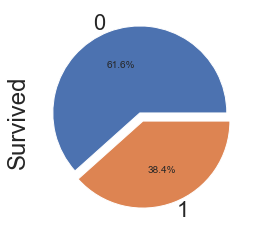

In [20]:
# 그래프 안에 값 넣기
df_train['Survived'].value_counts().plot.pie(explode=[0.1, 0], autopct = '%1.1f%%')

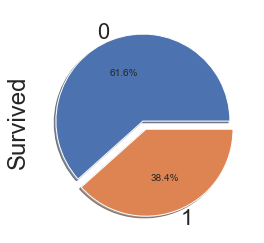

In [21]:
# 그래프에 음영 넣기
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)

* pandas Series데이터를 이용한 plot 그리기 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

# 2. Exploratory data analysis

## 2.1 PClass에 따른 생존률

* Pclass에 따른 생존률 차이 분석
* group by를 활용하여 Pclass, Survived 와 Pclass를 가져온 후 pclass로 묶기
* Pclass마다 0,1과 1이 카운터 되는데 이를 평균내면 각 pclass별 생존률이 됨

In [22]:
## groupby 구문: DataFrame.groupby([그룹화 기준 컬럼])[열로 나열할 컬럼].연산function
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
## as_index = False 로 지정할 경우 (혹은  as_index 구문을 아예 적지 않은 경우) : Pclass는 컬럼으로 남고, 0,1,2 가 index로 나타남
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [24]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index = True).sum() #생존자의 합계 계산

,Survived
Pclass,
1,136
2,87
3,119


In [25]:
## pandas의  crosstab을 활용한 시각화
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap = 'Wistia')
                                                                         ## All 표시여부      

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* matplotlib 에서 사용하고 있는 color : https://matplotlib.org/users/colormaps.html

In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


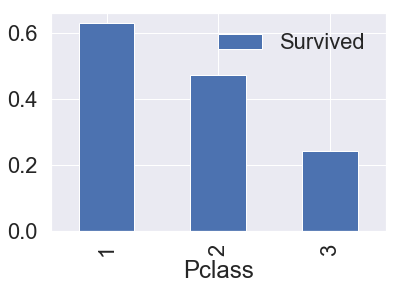

In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

* Pclass가 좋을 수록 생존률이 좋음을 확인 할 수 있음

좀 더 보기 쉽게 seaborn의 countplot 을 이용하면, 특정  label에 따른 개수를 확인해볼 수 있음

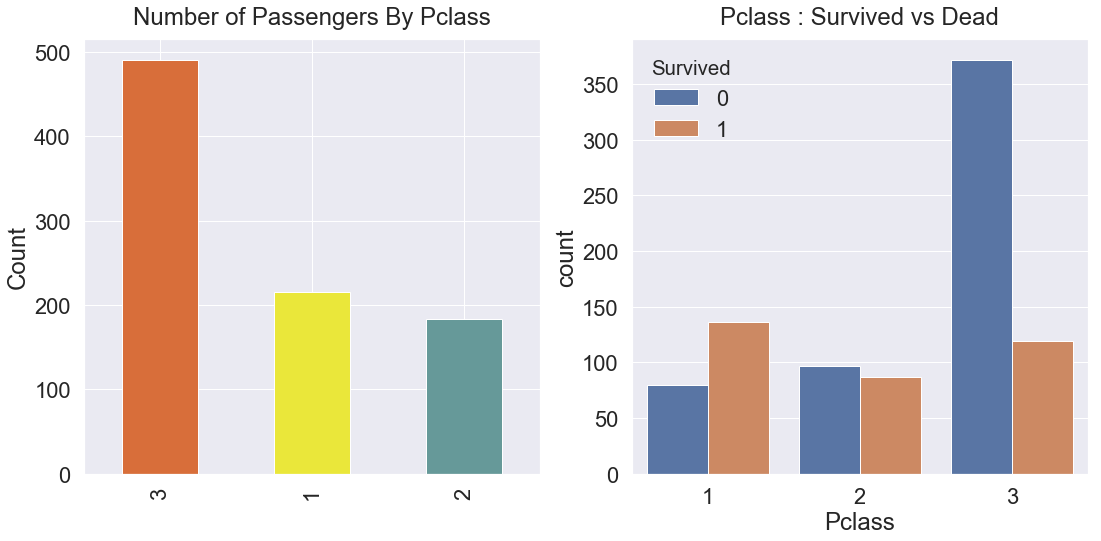

In [28]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#d86e3a', '#eae73a', '#669999'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

* 클래스가 높을 수록 생존률이 높음. 1등급 : 63%, 2등급 : 47%, 3등급 : 24%
 --> 모델을 만들 때 Pclass를 사용하는 것이 좋을 것
*  color RBC 코드 : https://www.w3schools.com/colors/colors_rgb.asp

## 2.2 Sex에 따른 생존률

* 성별에 따라 생존률이 어떻게 나타나는지 확인

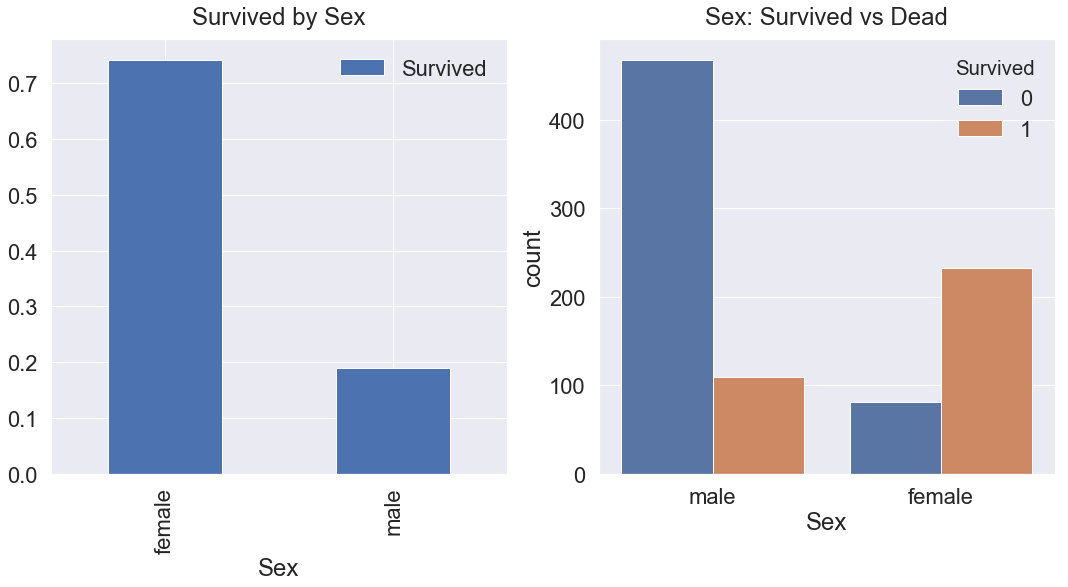

In [29]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=[18,8])
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex', y=y_position)

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead', y=y_position)

plt.show()

* 여성이 생존할 확률이 높음을 확인할 수 있습니다.

In [30]:
## groupby를 활용하여 남성, 여성의 생존률 구하기
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().sort_values(by='Survived', ascending=True)

,Survived
Sex,
male,0.188908
female,0.742038


In [31]:
# crosstab을 활용하여 
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* Pclass와 마찬가지로 Sex 역시 예측 모델에 중요한 feature임을 알 수 있음

## 2.3 Sex와 Pclass에 따른 생존률

* Sex와 Pclass 두 가지에 관해 생존률이 어떻게 달라지는지 확인

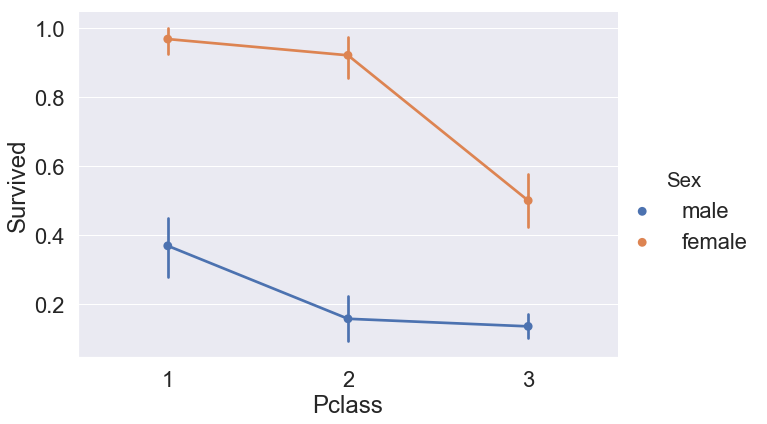

In [32]:
sns.factorplot(data=df_train, x='Pclass', y='Survived', hue='Sex', size = 6, aspect = 1.5)
## 아래 결과 그래프에서 세로 막대는 신뢰구간을 나타냄, 기본 세팅은 95% 신뢰구간

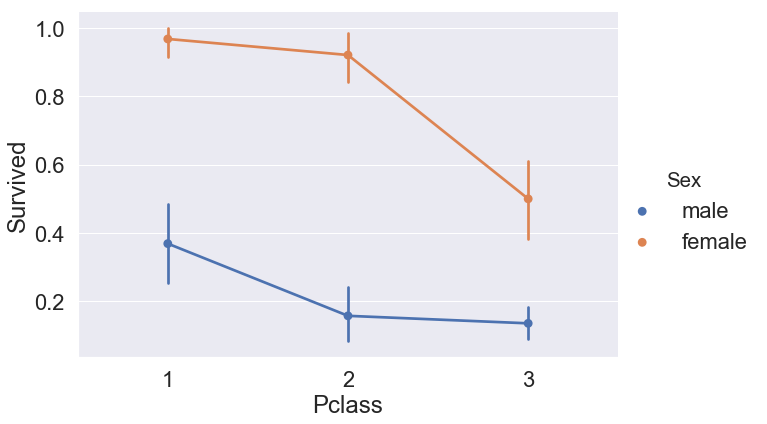

In [33]:
sns.factorplot(data=df_train, x='Pclass', y='Survived', hue='Sex', size = 6, aspect = 1.5, ci = 99)
# 신뢰구간을 99%로 설정하면 세로 막대가 더 길어짐

* 모든 Pclass에서 여성이 남성보다 생존 확률이 높다.
* 모든 성별에서 좌석 등급이 높을 수록 생존 확률이 높다.

위 그래프에서 hue 대신 column으로 하면 아래와 같이 결과가 나옵니다.

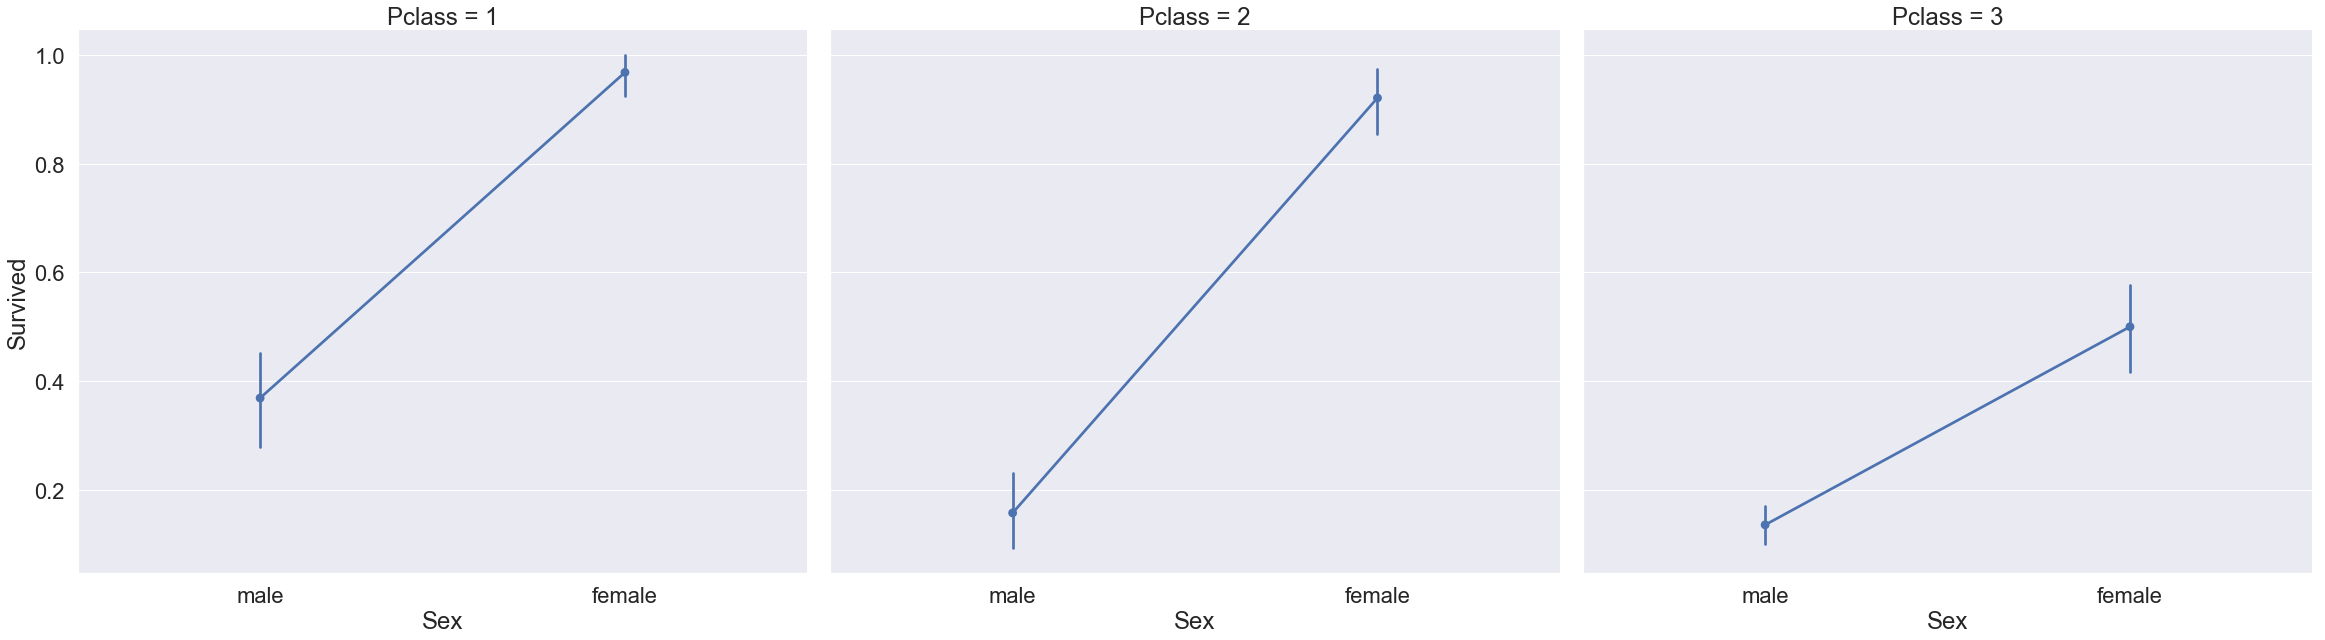

In [34]:
sns.factorplot(data=df_train, x='Sex', y='Survived', col ='Pclass', size = 9, aspect = 1.2, saturation = .5)

## 2.4 Age에 따른 생존률

In [35]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


* 생존에 따른 Age의 분포

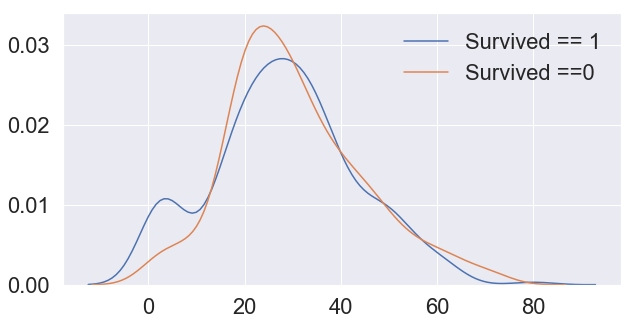

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived ==0'])

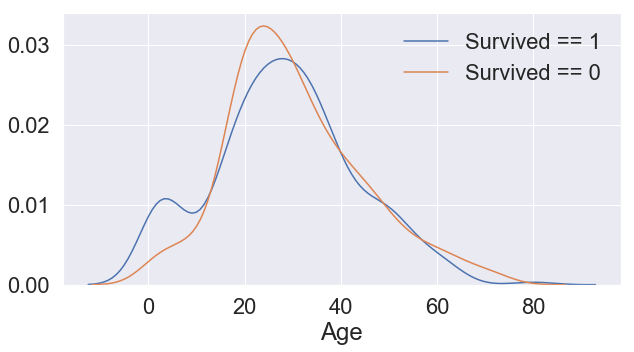

In [37]:
## 위와 동일한 결과를 distplot 을 활용하여 그리기
plt.figure(figsize=[10,5])
#sns.set_style('whitegrid')
sns.distplot(df_train[df_train['Survived'] == 1]['Age'], label = 'Survived == 1',hist=False)
sns.distplot(df_train[df_train['Survived'] == 0]['Age'], label= 'Survived == 0',hist=False)
plt.legend()

* 생존자 분포를 보면 어린 경우가 많음을 알 수 있습니다.

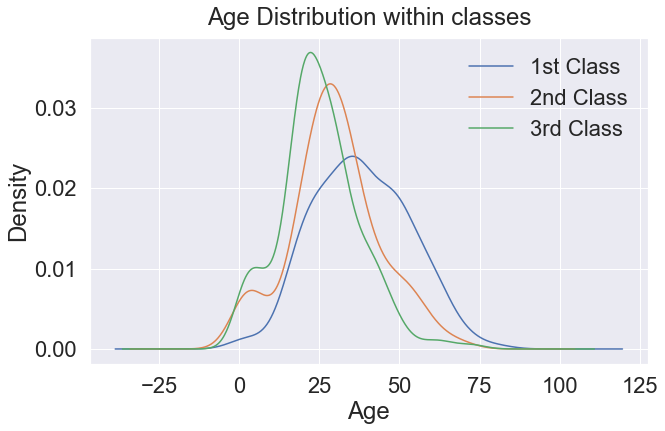

In [38]:
# Pclass 별 연령 생존 분포
y_position = 1.02
plt.figure(figsize=[10,6])

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes', y = y_position)
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* Pclass 가 높을 수록 연령 높은 사람의 비중이 올라갑니다.

Text(0.5, 1.0, 'Age of Survived within classes')

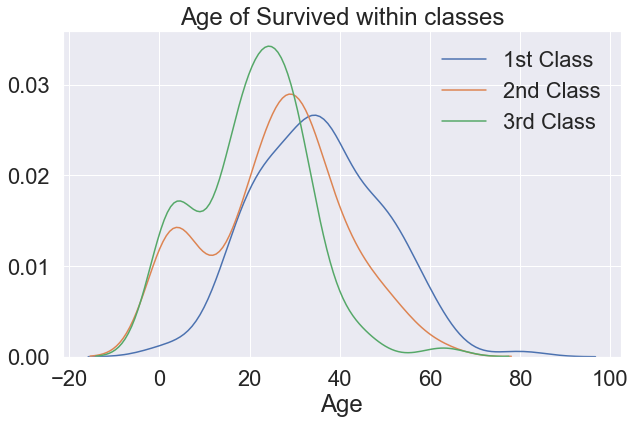

In [39]:
## 생존자들의 좌석 등급별 분포
plt.figure(figsize=[10,6])

sns.distplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'], hist=False, label ='1st Class')
sns.distplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], hist=False, label ='2nd Class')
sns.distplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], hist=False, label ='3rd Class')

plt.title('Age of Survived within classes')

* 2, 3등급의 생존자들의 경우, 연령이 어린 사람들의 비중이 전체 분포보다 조금 더 높아짐

* 나이대가 변하면서 생존률이 어떻게 되는지 보려고 합니다. 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 살펴보기

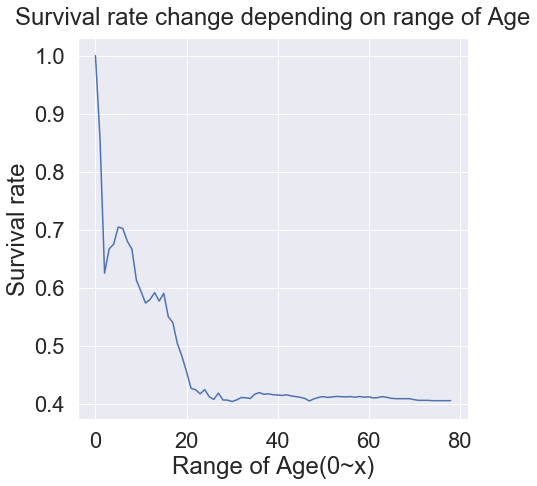

In [40]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=[7,7])
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 위의 분포에서 나이가 어릴 수록 생존률이 높음을 확인할 수 있습니다.

In [41]:
# for 구문에서 분자 부분
df_train[df_train['Age'] < 20]['Survived'].sum() 

79

In [42]:
# for 구문에서 분모부분
len(df_train[df_train['Age'] < 20]['Survived'])

164

## 2.5 Pclass, Sex, Age

* Pclass, Sex, Age, Survived 모두에 대해 시각화 --> violin plot을 이용
* x축은 우리가 나눠보고 싶어하는 case(이 케이스에서는 Pclass, Sex), y축은 보고싶어하는 distribution(Age)

* violin plot : https://seaborn.pydata.org/generated/seaborn.violinplot.html

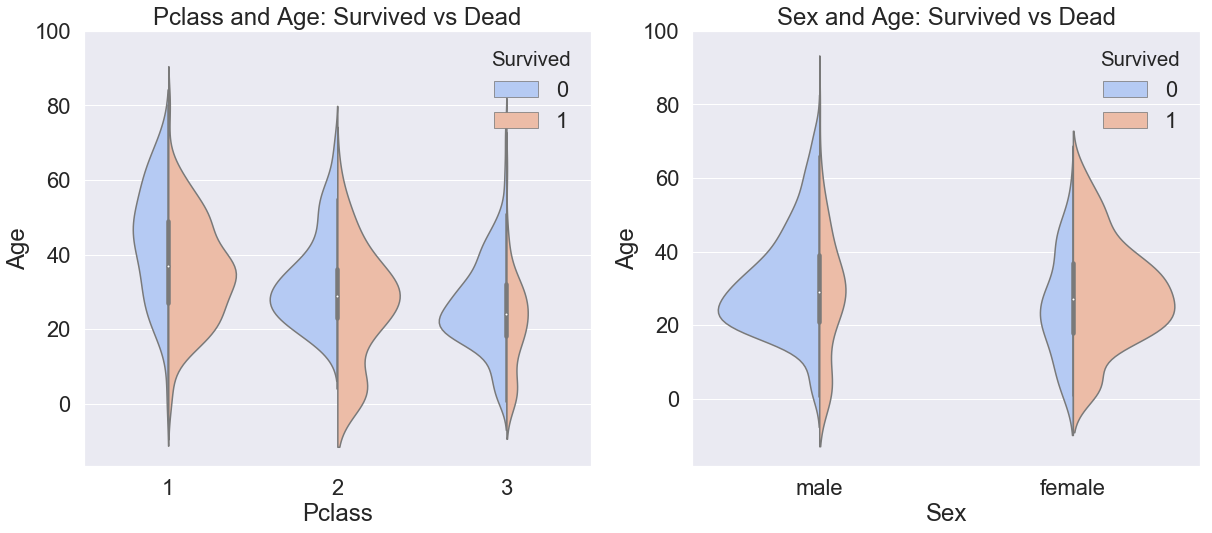

In [43]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.violinplot(data = df_train,
              x='Pclass',
              y='Age',
              hue='Survived',
              scale='count', # 가능한 옵션 : 'count' , 'area', 'width'
              split=True, # False로 놓아서도 그래프가 어떻게 바뀌는지 한번 확인하기
              ax=ax[0],
              palette='coolwarm')

ax[0].set_title('Pclass and Age: Survived vs Dead')
ax[0].set_yticks(range(0,110,20))

sns.violinplot(data = df_train,
              x='Sex',
              y='Age',
              hue='Survived',
              scale='count',
              split=True,
              ax=ax[1],
              palette='coolwarm')

ax[1].set_title('Sex and Age: Survived vs Dead')
ax[1].set_yticks(range(0,110, 20))

* 생존만 봤을 때, 모든  Pclass에서 나이가 어릴수록 생존자가 더 많음을 알 수 있습니다.
* 성별의 경우, 여자가 남성에 비해 생존률이 훨씬 높고, 그 중에서도 어린 경우 생존자가 더 높음을 알 수 있습니다.

## 2.6 Embarked

* Embarked 는 탑승한 항구를 나타냄

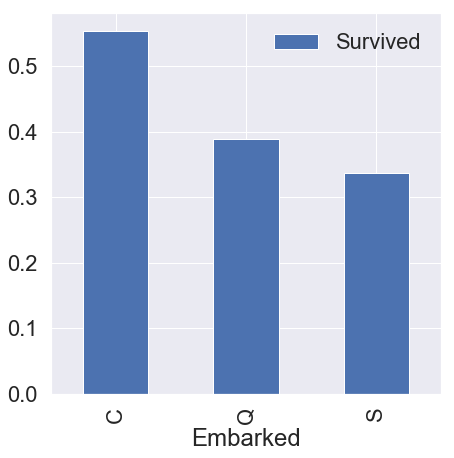

In [44]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

* 상대적으로 출발지가 C 인 경우의 생존률이 가장 높습니다.

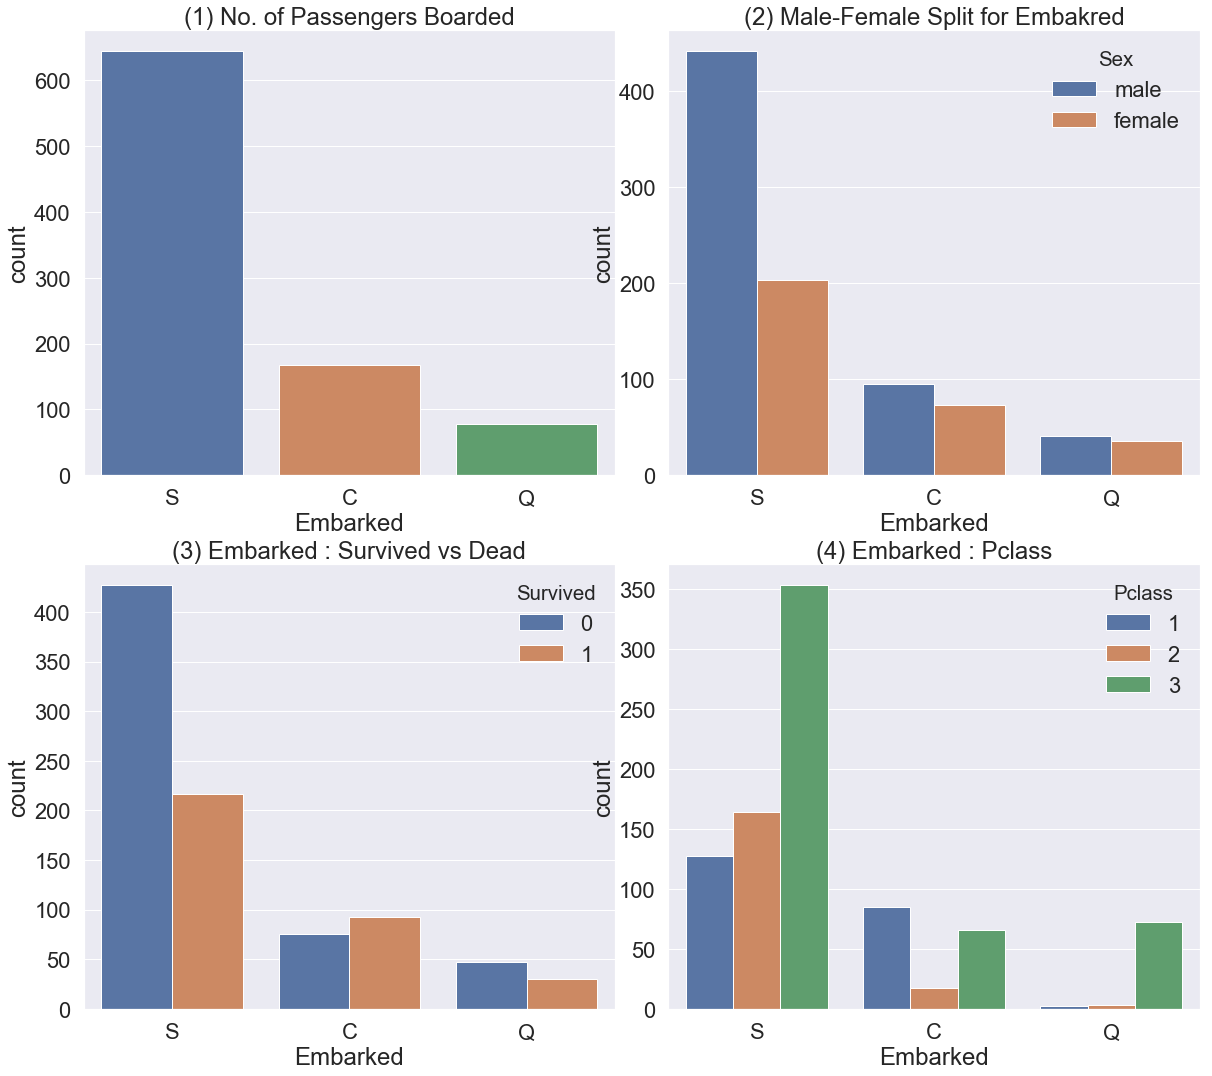

In [45]:
f, ax = plt.subplots(2, 2, figsize=(20,18))

sns.countplot(data=df_train, x='Embarked', ax=ax[0,0]).set_title('(1) No. of Passengers Boarded')
sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0,1]).set_title('(2) Male-Female Split for Embakred')
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1,0]).set_title('(3) Embarked : Survived vs Dead')
sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1,1]).set_title('(4) Embarked : Pclass')

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

* (1)번 그래프 : S에서 가장 많은 사람이 탑승했습니다.
* (2)번 그래프 : C, Q에 비해 S가 남성 탑승자 비윺이 높습니다.
* (3)번 그래프 : S가 상대적으로 생존률이 가장 낮고, C의 경우에는 생존자가 더 많습니다.
* (4)번 그래프 : C가 상대적으로 생존 확률이 높았는데 , S나 Q에 비해 1st Class 탑승자 비율이 더 높습니다.

## 2.7 Family - SibSp(배우자, 형제) + Parch(부모, 자녀)

In [46]:
# SisSp와 Parch를 합쳐서 FamilySize 만들기
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1 #자신을 더해야 하니 1을 더합니다.
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1 

In [47]:
print("Maximum Size of Family :", df_train["FamilySize"].max())
print("Minimum Size of Family : ", df_train["FamilySize"].min())

Maximum Size of Family : 11
Minimum Size of Family :  1


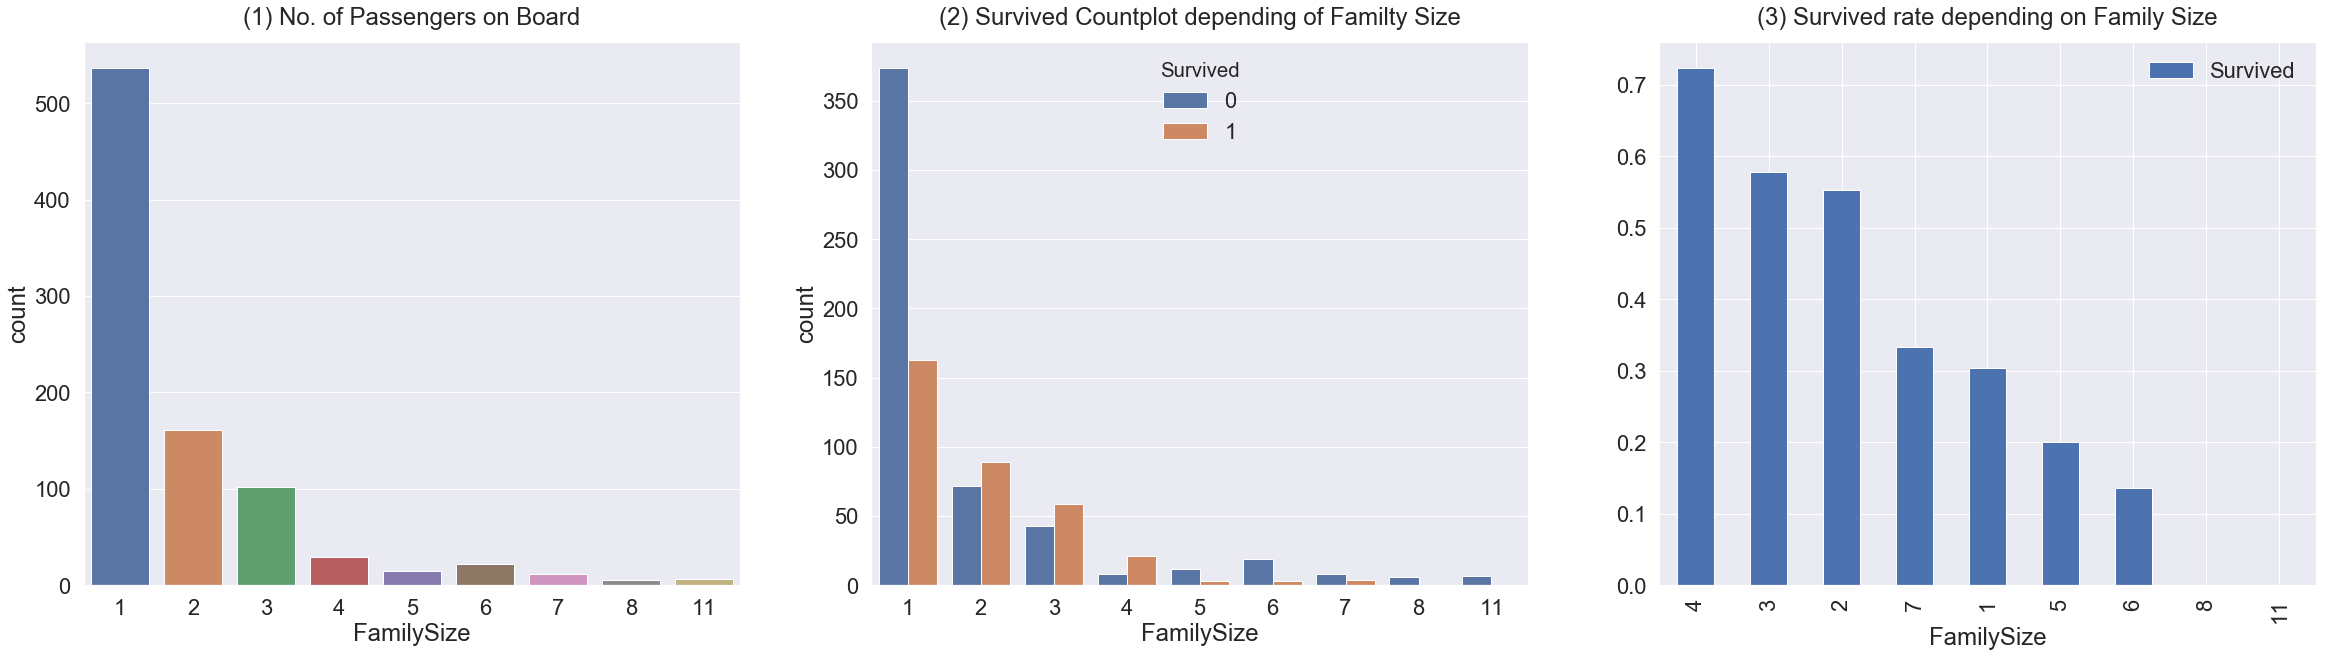

In [48]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers on Board', y=1.02)

sns.countplot('FamilySize', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived Countplot depending of Familty Size', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

* (1) 가족크기가 11까지 있고, 대부분 혼자 탑승했습니다.
* (2), (3) 가족 크기에 따른 생존 비교로 2~4인 가족의 생존률이 높고 그중에서도 4인가족의 생존률이 가장 높습니다. 가족 수가 너무 많아도 적어도 생존률이 낮아집니다.

## 2.8 Fare

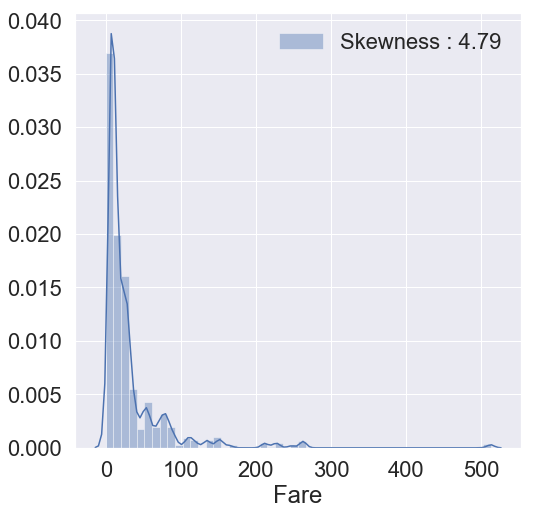

In [49]:
fig, ax = plt.subplots(1,1, figsize=[8,8])
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

 * 분포가 매우 비대칭적인 형태로 나타남, 이 분포를 그대로 모델에 넣어주면 모델이 잘못학습될 수가 있음.
 * Outlier의 영향을 줄이기위해 fare에 log를 취해서 분포를 그려보겠습니다.

In [50]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() ## df_test에는 Fare가 NaN값이 존재했기 때문에 처리

df_train['Fare']= df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare']= df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

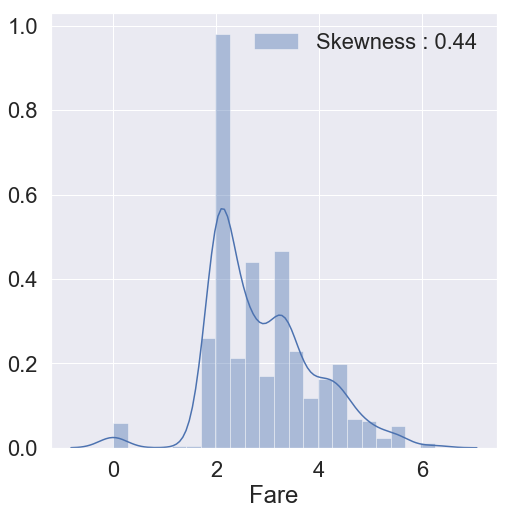

In [51]:
fig, ax = plt.subplots(1, 1, figsize = [8.,8])

g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format( df_train['Fare'].skew() ), ax=ax)
g = g.legend(loc='best')

* log 를 취하니 비대칭성이 많이 사라진 것을 확인할 수 있습니다.
* 이러한 작업을 통해 뒤에 작업하는 모델이 더 좋은 성능을 내도록 할 수 있습니다.

### 2.9 Cabin

* NaN값이 너무 많이 때문에 분석에서 제외

### 2.10 Ticket

* NaN 값을 알 수 없지만, string data이므로 우리가 추가 작업을 해주어야 모델에 사용이 가능

In [52]:
df_train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
PC 17757             4
17421                4
19950                4
2666                 4
113781               4
LINE                 4
347077               4
113760               4
349909               4
4133                 4
W./C. 6608           4
PC 17755             3
110152               3
239853               3
248727               3
PC 17572             3
24160                3
363291               3
PC 17760             3
110413               3
371110               3
230080               3
                    ..
364846               1
315086               1
28134                1
315151               1
PC 17610             1
112059               1
2674                 1
111427               1
34218                1
SOTON/O.Q. 392087    1
330877               1
29108                1
2669       

# 3. Feature Engineering

* 가장 먼저, data set에 존재하는 null data를 채우기
* null data를 어떻게 채우냐에 따라 모델의 성능이 달라질 수 있음
* Feature Engineering은 실제 모델 학습에 사용할 것이기 때문에, train과 test에 동시에 적용해주어야 함

In [53]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls

## 3.1 Fill Null

In [54]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.948596,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2


### 3.1.1 Fill Null in Age

In [55]:
df_train['Age'].isnull().sum()

177

* df_train 데이터 세트에 보면 Null data가 177개가 있습니다.
* 단순히 평균으로 데이터를 채우기 보다 title(Mr, Mrs, Miss 등)을 활용하여 채워보겠습니다.

In [56]:
### Name 데이터에서 title 만 뽑아내기
df_train.Name.str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [57]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

* 판다스의 crosstab을 이용하여 추출한 Initial 과 Sex 간의 Count를 살펴보기

In [58]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') # 가운데 T는 열, 행 변환

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [59]:
df_train['Initial'].replace(["Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Lady", "Major" , "Master", "Miss", "Mlle", "Mme", "Mr", "Mrs" , "Ms", "Rev", "Sir"],
                                      ["Mr", "Other", "Mrs", "Mr", "Mr", "Other", "Mrs", "Mr" , "Master", "Miss", "Miss", "Miss", "Mr", "Mrs" , "Miss", "Other", "Mr"], inplace =True )

In [60]:
df_test['Initial'].replace(["Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Lady", "Major" , "Master", "Miss", "Mlle", "Mme", "Mr", "Mrs" , "Ms", "Rev", "Sir"],
                                      ["Mr", "Other", "Mrs", "Mr", "Mr", "Other", "Mrs", "Mr" , "Master", "Miss", "Miss", "Miss", "Mr", "Mrs" , "Miss", "Other", "Mr"], inplace =True )

In [61]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


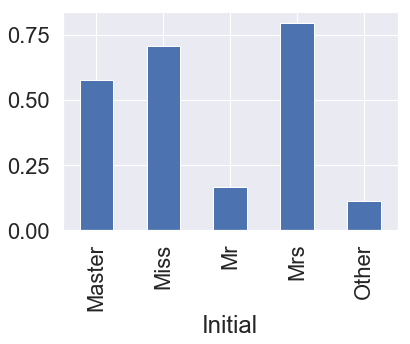

In [62]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

* Null 값을 채우기
 - statistics 를 활용하는 방법, 머신러닝을 활용하는 방법이 있는데 이번에는 statistics를 활용하는 방법
  - train에서 얻은 statistics를 기반으로 test의 null data도 채워주어야 합니다.

In [63]:
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[ (df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46

In [64]:
df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[ (df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [65]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null Values')

Embarked has  2  Null Values


 * Null 값이 2개만 있기 때문에 가장 많은 출발지였던 S로 간단히 채움

In [66]:
df_train['Embarked'].fillna('S', inplace =True)

## 3.2 Change Age(continuous to categorical)

* 현재 continuous feature인 Age를 몇개의 group으로 나누어 category화 시키기

In [67]:
# (1) loc 활용해서 채우기
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10 , 'Age_cat'] = 0
df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(df_train['Age'] >= 20) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(df_train['Age'] >= 30) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(df_train['Age'] >= 50) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(df_train['Age'] >= 60) & (df_train['Age'] < 70), 'Age_cat'] =6
df_train.loc[df_train['Age'] >= 70, 'Age_cat'] = 7

In [68]:
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10 , 'Age_cat'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(df_test['Age'] >= 50) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(df_test['Age'] >= 60) & (df_test['Age'] < 70), 'Age_cat'] =6
df_test.loc[df_test['Age'] >= 70, 'Age_cat'] = 7

In [69]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [70]:
# (1) apply 함수 활용하기
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age) 

* 두 가지 방법이 모두 잘 적용되었다면 갈튼 결과를 내야함
* 이를 확인하기 위해 Series 간 boolean 비교 후 all() 메소드를 사용해서 검증
  --> all() 메소드는 모든 값이 True 면 True , 하나라도 False 가 있으면 False 를 줌

In [71]:
print('1번방법, 2번방법 둘다 같은 결과를 내면 True를 줘야 함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번방법, 2번방법 둘다 같은 결과를 내면 True를 줘야 함 ->  True


* 둘다 같은 결과를 낸 것을 확인했으므로 중복되는 컬럼 Age_cat2를 제거하고 Age도 제거

In [72]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace = True)
df_test.drop(['Age'], axis =1, inplace = True)

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


## 3.3 Change Initial , Embarked, and Sex (String to numercial)

* 숫자가 아닌 데이터들은 숫자 형태로 변환을 시켜야 나중에 러닝할 때 컴퓨터가 인식 가능
* Initial : Mr, Mrs, Miss, Master, Other 총 5개로 이루어진 카테고리 데이터를 숫자로 변환
* map method를 활용하여 간단히 변환

In [74]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0,  'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0,  'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

* Embarked도 C, Q, S로 이루어져 있는데 map을 이용하여 변환

In [75]:
print(df_train['Embarked'].unique())

print(df_train['Embarked'].value_counts())

['S' 'C' 'Q']
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [76]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0 , 'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0 , 'Q' : 1, 'S' : 2})

* Embarked에 있는 Null 값을 아까 전처리 과정에서 모두 'S'로 처리했기 때문에, isnull() 과 any()를 사용하여 null 값이 존재하는지 다시 확인해본다.
 - any()를 사용해서 True가 하나라도 있으면(Null이 하나라도 있으면) True를 반환하게 됨

In [77]:
df_train['Embarked'].isnull().any()

False

In [78]:
df_test['Embarked'].isnull().any()

False

* 성별도 변환

In [79]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

* 지금까지 처리한 feature 사이의 상관관계 보기
 - 두 변수간의 Pearson correlation 을 구하면 -1 과 1 사이의 값을 얻을 수 있음
 - 1로 갈수록 양의 상관관계, -1로 갈수록 음의 상관관계가 있는 것, 0은 특별한 상관관계가 없는 것


* 여러 feature들의 상관관계를 하나의 matrix형태로 편하게 보기 위해  heatmap plot을 사용 
 - https://seaborn.pydata.org/generated/seaborn.heatmap.html

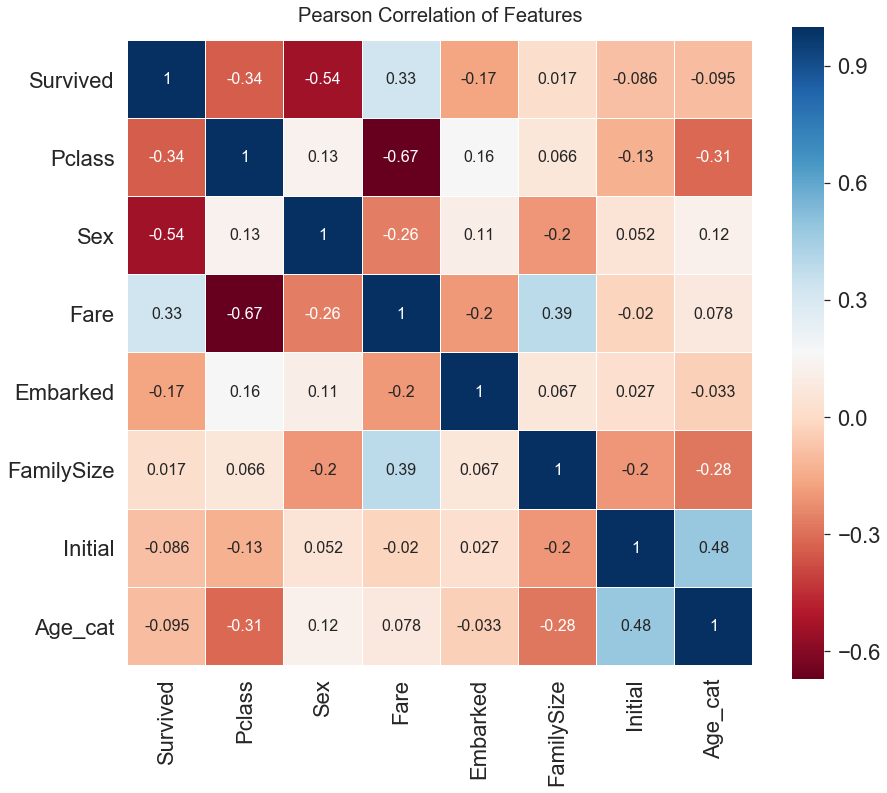

In [80]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=[14,12])
plt.title('Pearson Correlation of Features', y=1.02, size = 20)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1,
           square=True, cmap = colormap, linecolor='white', annot =True, annot_kws={'Size' : 16})

del heatmap_data

* Sex와 Pclass, Fare가 Survived와 상관관계가 높은 편
* 각 feature 간의 상관관계는 크지 않아 불필요한 feature가 없다는 것을 의미

## 3.4 One-hot encoding on Initial and Embarked

* 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만 모델의 성능을 높이기 위해 One-hot-encoding을 해줄 수 있습니다.
* 수치화는 간단히 Mater ==0, Miss == 1 등으로 매핑해주는 것을 말합니다.
* One-hot encoding은 위 카테고리를 (0,1)로 나뉘어진 벡터로 나타내는 것을 말합니다.
* 서수형이 아닌 데이터는 값의 높낮이가 중요하지 않음, 이럴 때 one-hot-encoding을 하면, 모델링하기 더 좋음
* get_dummies를 활용하여 일일이 컬럼을 만들어 줄 필요 없이 한 줄로 간단히 가능하다. 대신 원래의 카테고리 정보가 들어있던 컬럼은 삭제된다.

In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [82]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [83]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [84]:
df_train  = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test  = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [85]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


* sklearn의 Labelencoder+Onehotencoder를 이용해도 One hot encoding이 가능
* 카테고리의 수가 너무 많으면 학습이 버거울 경우가 있기 때문에 이럴때는 다른 방법을 사용함

## 3.5 Drop columns

    필요한 columns를 제외하고 모두 삭제 처리

In [86]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [87]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace =True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace =True)

In [88]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [89]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


* Survived를 제외하고는 같은 columns로 필요한 데이터만 정리

# 4. Building Machine Learning Model and Prediction using the trained model

In [90]:
# 필요한 Machine Learning 패키지 불러오기
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics # 모델의 평가를 위해 불러옴
from sklearn.model_selection import train_test_split # training set을 쉽게 나눠주는 함수

* Titanic 문제는 target class(survived)가 0과 1로 이루어진 binary classification 문제입니다.
* 현재 가지고 있는 train set의 survived 를 제외한 input을 가지고 모델을 최적화시켜, 탑승객들의 생존 여부를 판단하는 모델을 만듭니다.
* 그 후 학습하지 않은 test set를 input으로 넣어 test set의 탑승객의 생존 여부를 예측합니다.

## 4.1 Prediction - Split data set into train, valid, test set

In [91]:
X_train = df_train.drop(['Survived'], axis=1).values # 학습용 데이터
target_label = df_train['Survived'].values 
X_test = df_test.values # 예측용 데이터

* train_test_split을 사용하여 쉽게 train set을 분리 할 수 있습니다.

* train_test_split 설명

(출처: http://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=true&from=search)
 
 train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
 
 (1) Parameter 
   - array : 분할시킬 데이터를 입력
   - test_size : 테스트 데이터 셋의 비율(float)이나 갯수(int) (default = 0.25)
   - train_size : 학습 데이터 셋의 비율(default = test_size의 나머지)
   - random_state : 데이터 분할 시 셔플이 이루어지는데 이를 위한 시드값(int나 Random State로 입력)
   - shuffle : 셔플여부 결정(default = True)
   -  stratify : 지정한 data의 비율을 유지, 예를 들어 Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set 일 때, stratify = Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한채 분할
   
 
 (2) Return
   - X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환, 데이터와 레이블의 순서쌍 유지
   - X_train, X_test : array에 레이블 없이 데이터만 넣었을 경우 반환

In [92]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [93]:
print(X_train.shape) # 원 데이터 행과 열
print(X_tr.shape)  # 학습 데이터 행과 열
print(X_vld.shape) # 모델 평가용 데이터 행과 열
print(y_tr.shape) 
print(y_vld.shape)

(891, 13)
(623, 13)
(268, 13)
(623,)
(268,)


* scikit learn : https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* sklearn 의 여러 알고리즘 중 랜덤포레스트 모델을 사용
* 랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델(?)
* 랜덤포레스트에서 사용하는 여러 파라미터가 있음
 - n_estimators, max_features, max_depth, min_sample_split, min_sample_leaf 등이 존재하며 이것을 어떻게 세팅하느냐에 따라 같은 데이터 셋이라도 모델의 성능이 달라짐
* 모델 객체를 만들고 fit 메소드로 학습을 시킴
* 그 후 valid set input을 넣어주어 예측값(X_vld sample의 생존여부)를 얻습니다.

## 4.2 Model generation and prediction

In [94]:
model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)
prediction # 총 268개의 데이터에 대한 생존, 사망 예측

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [96]:
print('총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.72%의 정확도로 생존을 맞춤


## 4.3 Feature importance

* 학습된 모델은 feature importance를 가지게 되는데, 이것을 확인하여 지금 만든 모델이 어떤 feature의 영향을 많이 받았는지 확인할 수 있습니다.
* 가령, y = 4a+2b+c 라고 하면 a가 가장 큰 영향을 줌
* 판다스의 series를 이용하면 쉽게 sorting하여 그래프를 그릴 수 있습니다.

In [97]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
Series_feat_imp

Pclass         0.098238
Sex            0.091999
Fare           0.353544
FamilySize     0.094008
Age_cat        0.134840
Initial_0.0    0.007631
Initial_1.0    0.039097
Initial_2.0    0.096223
Initial_3.0    0.039282
Initial_4.0    0.002577
Embarked_0     0.014645
Embarked_1     0.011842
Embarked_2     0.016076
dtype: float64

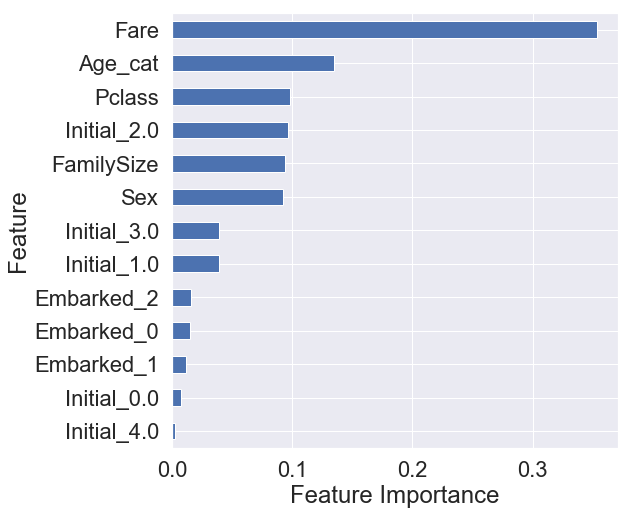

In [98]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

* 현재 얻은 모델에서는 Fare가 가장 큰 영향력을 가지며 그 뒤로 Age_cat, Sex, Pclass 등이 차례로 중요도를가짐, 다만, model에서 random_state를 고정시키지 않고 그냥 두면 실행할 때마다 조금씩 순서가 바뀔 수 있음
* 다른 모델을 사용하면 결과가 또 다르게 나올 수 있음
* 위 결과에서는 Fare가 중요한 feature라고 판단을 내릴 수 있지만, 결국 모델에 귀속된 결론이기 때문에 통계적으로 더 살펴보아야 합니다ㅓ.
* feature importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection 을 할 수도 있고, 좀 더 빠른 모델을 위해 feature 제거를 할 수 있습니다.

## 4.4 Prediction on Test set

* 이제 모델이 학습하지 않았던 테스트 셋을 모델에 주어서, 생존여부를 예측합니다.
* 이 결과를 캐글에 제출해서 결과를 leaderboard에서 확인할 수 있습니다.
* 캐글에서 받은 gender_submission.csv 파일을 읽어서 제출할 준비를 합니다.

In [99]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [100]:
prediction = model.predict(X_test)
submission['Survived'] = prediction # prediction 결과를 Survived 컬럼에 넣기

In [101]:
submission.to_csv('190616_Titanic.csv', index=False)